In [139]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy.constants as const
import scipy.integrate as spi
hbar=1
m=1
a=0.01
xTotal=10
nPoints=int(xTotal/a)
energy=9
k= np.sqrt(2*m*energy/hbar**2)

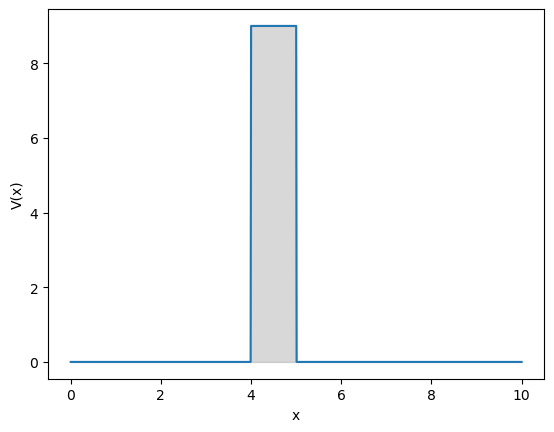

In [140]:
#Defining a potential
V0=9
x=np.linspace(0,10,nPoints+1)
V=np.full_like(x,0)
V[(x<=5) & (x >= 4)]=V0
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

In [141]:
def psi(j):
    if j==0:
        return 1
    if j==1:
        return np.exp(-1j*k*a)
    else:
        return (2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*psi(j-1)-psi(j-2)


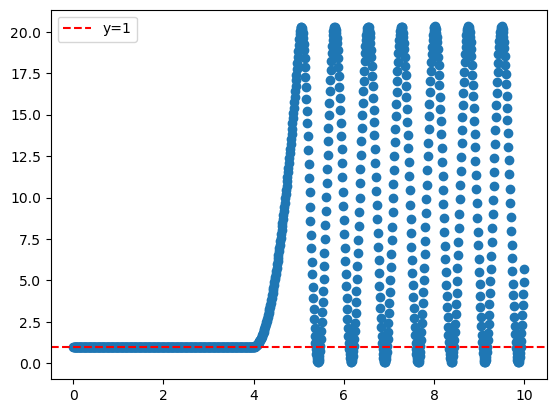

In [142]:
Psi= np.full_like(x,0,dtype=complex)
Psi[0]=1
Psi[1]=np.exp(-1j*k*a)
for j in range(2,nPoints+1):
    Psi[j]=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
PsiSquared = (Psi*np.conjugate(Psi)).real
plt.scatter(x,PsiSquared)
plt.axhline(1,linestyle='--',color='red',label='y=1')
plt.legend()
plt.show()

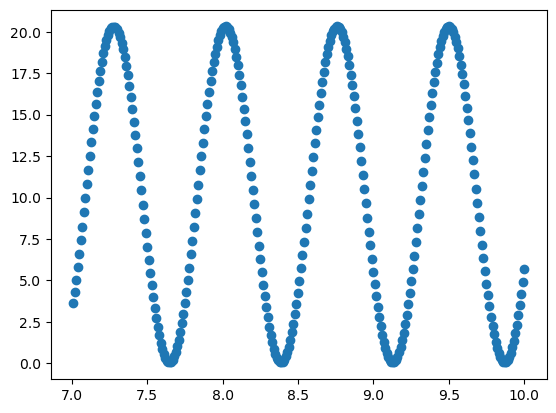

In [143]:
plt.scatter(x[-300:],PsiSquared[-300:])

In [144]:
PMin= np.min(PsiSquared[-300:])
PMax= np.max(PsiSquared[-300:])
trans=2/(1+(PMin+PMax)/2)
print("Transmission probability=",trans)

Transmission probability= 0.17881856040903993


In [150]:
def transmission(energy):
    k= np.sqrt(2*m*energy/hbar**2)
    Psi= np.full_like(x,0,dtype=complex)
    Psi[0]+=1
    Psi[1]+=np.exp(-1j*k*a)
    for j in range(2,nPoints+1):
        Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
    PsiSquared = (Psi*np.conjugate(Psi)).real
    PMin= np.min(PsiSquared[-300:])
    PMax= np.max(PsiSquared[-300:])
    return 2/(1+(PMin+PMax)/2)


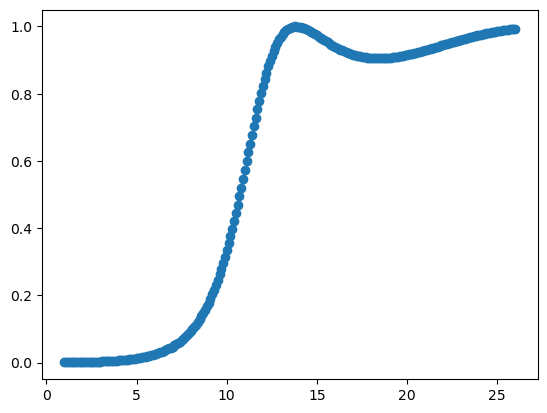

In [146]:
E=np.linspace(1,26,251)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
plt.scatter(E,TransProb)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21376\3104483573.py:6: RuntimeWarning: invalid value encountered in double_scalars
  TransProb[i]=1/(1+((V0*V0*(np.sinh(w*np.sqrt(2*m*(V0-E[i])/hbar**2))))**2)/(4*E[i]*(V0-E[i])))
C:\Users\HP\AppData\Local\Temp\ipykernel_21376\3104483573.py:6: RuntimeWarning: invalid value encountered in sqrt
  TransProb[i]=1/(1+((V0*V0*(np.sinh(w*np.sqrt(2*m*(V0-E[i])/hbar**2))))**2)/(4*E[i]*(V0-E[i])))


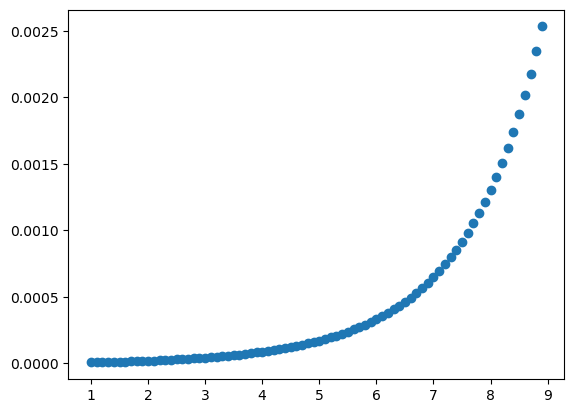

In [147]:
#Plot obtained from classical quantum mechanics
w=1
E=np.linspace(1,26,251)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=1/(1+((V0*V0*(np.sinh(w*np.sqrt(2*m*(V0-E[i])/hbar**2))))**2)/(4*E[i]*(V0-E[i])))
plt.scatter(E,TransProb)
plt.show()

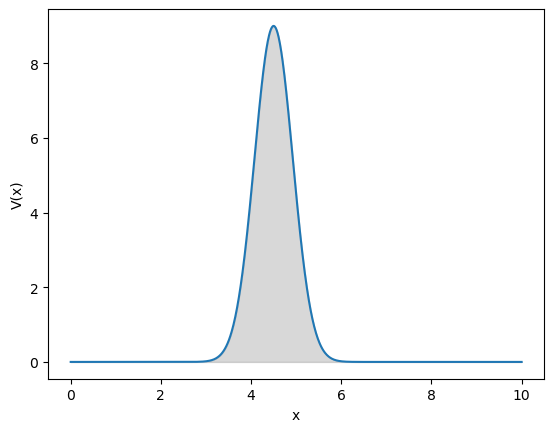

In [148]:
A=9
X=4.5
c=0.6
V=A*np.exp(-((x-X)/c)**2)
plt.fill_between(x, V, interpolate=True, color='gray', alpha=0.3)
plt.plot(x,V)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

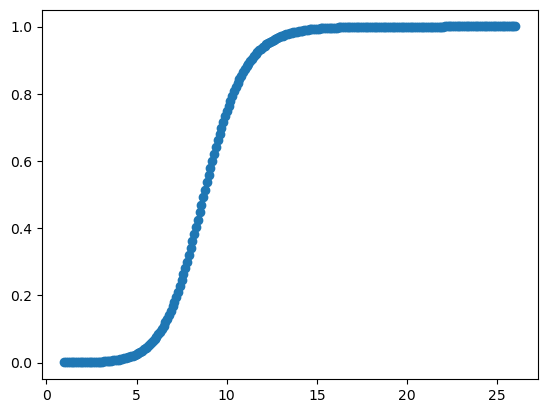

In [149]:
def transmission(energy):
    k= np.sqrt(2*m*energy/hbar**2)
    Psi= np.full_like(x,0,dtype=complex)
    Psi[0]+=1
    Psi[1]+=np.exp(-1j*k*a)
    for j in range(2,nPoints+1):
        Psi[j]+=(2-(2*m/hbar**2)*(energy-V[j-1])*a*a)*Psi[j-1]-Psi[j-2]
    PsiSquared = (Psi*np.conjugate(Psi)).real
    PMin= np.min(PsiSquared[-300:])
    PMax= np.max(PsiSquared[-300:])
    return 2/(1+(PMin+PMax)/2)
E=np.linspace(1,26,251)
TransProb=np.full_like(E,0)
for i in range(len(TransProb)):
    TransProb[i]=transmission(E[i])
plt.scatter(E,TransProb)
plt.show()